## BPNet tf-Modisco report

In [1]:
modisco_dir = "/users/avsec/workspace/basepair/data/processed/chipnexus/exp/models/oct-sox-nanog-klf/models/n_dil_layers=9/modisco/valid/new-hparams"

In [2]:
# Parameters
modisco_dir = "Klf4"


In [3]:
from basepair.modisco.results import ModiscoResult
from basepair.config import get_data_dir
from basepair.utils import read_json
from basepair.plot.vdom import vdom_modisco
from kipoi.readers import HDF5Reader
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from plotnine import *

Using TensorFlow backend.


In [4]:
mr = ModiscoResult(f"{modisco_dir}/modisco.h5")
mr.open()

In [5]:
# load the data
modisco_kwargs = read_json(os.path.join(modisco_dir, "kwargs.json"))
d = HDF5Reader(modisco_kwargs['imp_scores'])
d.open()

In [6]:
strand_dist_file = f"{modisco_dir}/strand_distances.h5"
if modisco_kwargs.get("ignore_strand_dist", False) and os.path.exists(strand_dist_file):
    included_samples = HDF5Reader.load(strand_dist_file)['included_samples']
else:
    included_samples = np.ones(d.f['inputs'].shape[:1], dtype=bool)
    
if modisco_kwargs.get("filter_npy", None) is not None:
    included_samples = np.load(modisco_kwargs['filter_npy']) * included_samples
    
    
id_hash = pd.DataFrame({"peak_id": d.f['/metadata/interval_from_task'][:][included_samples], 
                        "example_idx": np.arange(d.f['/metadata/interval_from_task'][included_samples].shape[0])})
tasks = list(d.f["targets"]["profile"].keys())

In [7]:
# get all seqlet instances
dfp = mr.seqlet_df_instances().rename(columns=dict(seqname="example_idx"))
dfp = pd.merge(dfp, id_hash, on="example_idx")

TF-MoDISco is using the TensorFlow backend.


In [8]:
# row = example_idx
total_counts = pd.DataFrame({task: d.f[f"/targets/profile/{task}"][:][included_samples].sum(axis=-1).sum(axis=-1)
          for task in tasks
         })

In [9]:
len(mr.patterns())

18

In [10]:
# total number of seqlets
len(dfp)

26318

In [11]:
# Number of metaclusters
len(mr.metaclusters())

2

### Number of seqlets per pattern

In [12]:
mc_stat = mr.metacluster_stats()

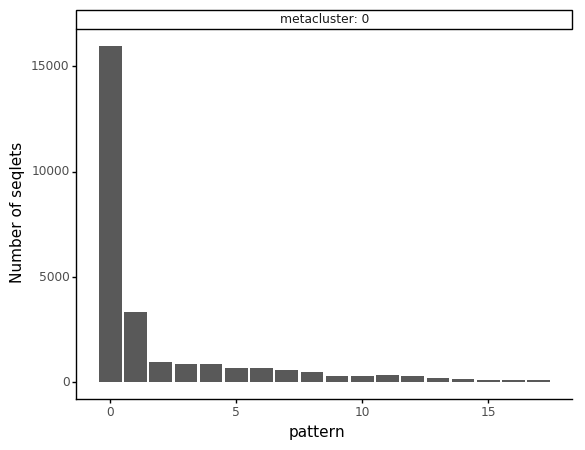

<ggplot: (8727902049996)>

In [13]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic()

### Zoom-into the 500 seqlet range

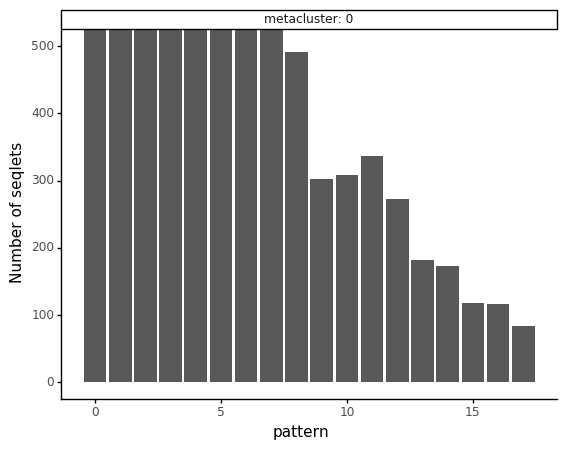

<ggplot: (-9223363308952710726)>

In [14]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic() + coord_cartesian(ylim=[0, 500])

## Important tasks per metacluster

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


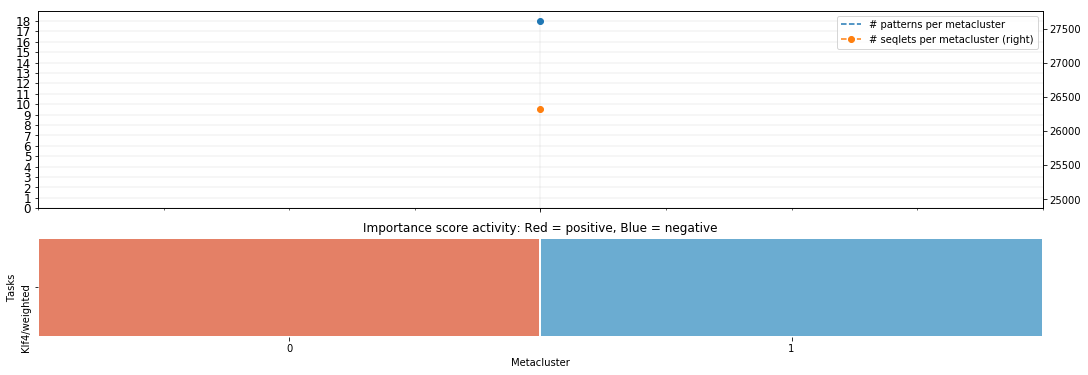

In [15]:
mcs_grouped = mc_stat.groupby("metacluster").n.agg(["count", "sum"]).reset_index()
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(18,6), 
                       gridspec_kw={'height_ratios': [2,1]})
mcs_grouped.plot("metacluster", "count", 
                 label="# patterns per metacluster", style="o--", 
                 ax=ax[0], 
                 yticks=range(mcs_grouped['count'].max()+1),
                 xticks=range(38),
                 fontsize='large',
                 xlim=(-.5, len(mr.metaclusters()) - .5 ))
mcs_grouped.plot("metacluster", "sum", 
                 label="# seqlets per metacluster", 
                 style="o--", ax=ax[0], secondary_y=True)
ax[0].grid(linewidth=0.2)
mr.plot_metacluster_activity(ax[1], cbar=False)
ax[1].set_title("Importance score activity: Red = positive, Blue = negative");

In [16]:
vdom_modisco(mr, "plots", total_counts, dfp, is_open=True, trim_frac=0.08, letter_width=0.15, height=0.5)

<div><details id="metacluster_0" open><summary><b>metacluster_0</b>, # patterns: 18, # seqlets: 26318, important for: <b>Klf4</b></summary><ul><li><details id="metacluster_0/pattern_0"><summary>pattern_0: # seqlets: 15954<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAIcAAABaCAYAAACSR0X7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAFDpJREFUeJztnXt0FdW9xz8zc05y8n5ICBDeQQVEQIIURCpaX8tKsVZpqbUqa6lVS1UUanvXXb2r99Zb76q111us2qvSViu2WhAVQbQqYFCQp6CAQCCQN%2BRFkvOeuX/85mTmJGfyIIgn3vmuddbMnLOzZ8/s7/7t3%2B%2B3f/sXxTAMAxcuEkD9shvgInnhksOFI1xyuHCESw4XjnDJ4cIRLjlcOMIlhwtHuORw4QiXHC4c4fmyG3Ba0LAD9j4GaDD2J5A3OXG52vVw8DlIL4JzFkJa4RltZn%2BD0u/d55VrYcP1EPUDBmhpMGsFDLkqvtz%2BJ2D7Yoi2geIBbw5cvQUyR53afeu3w6YfQvM%2ByJ8CM/8KmaP7/DjJhP5NjlAjvDoCws3x33tzYM4B8A2Q66bPYE2JSSATigrZ4%2BGanXLeG5w8AG9eAJEW8wsVUnLh2r3gKzjlx0k29G%2Bd47NHQQ91/j4agD0PW9fbF0M0GF/G0KG1DMpf7v19N90CkVbbFzqET8JHC3pfVxKj/5LD0OHzpUKEjtCDcPB/5dxfA9VvA3rncpFW2Pvb3t23fpvoOHQQuEYYqt%2BBxk96V18So/%2BS4/gm0CPOv%2BthOR5bAYrmXC7S1rv77l8KegJCtrfrw97Vl8Tov9bKsVdtol0BNQUwRKIYNtIceUmUUAAlBRREx0gkcbqDYcDRV%2BQeCaH0vs4kRv%2BVHJWraZ8qtHRRLL9VBqlnWWUMHU58ZF2n5sPccrjsbfmb3qLp03jiebLh7LvAm31Kj5Ds6J/k0MNwcr%2Bcqylwzj2QfS6kD4Hpy0BNBXRo3m9NKZ5MuOBR8W0UzITxP%2B29lVK33pIaWjpcshIufAIufx9UXxcSpX8i%2BcnRWi5KXkyHAGjeK50B4rMotlkJg6%2BC1AKxYuq3Wt/rYRh%2BvXU9dpF0ZvB4z9tS875lDqcXQeGlcp43GUbM61oX6YdIXnIET8Dbs%2BH1c%2BGtmbCiCKr/Kb817rHKaT7IOse6VhQ4%2B06z3C5LL8mfKmVj8GZCxigIVPW8TfUfy1FNgZE3x/82/iE5GtGe15fkSE5y6GF4%2B1KoKxXFMXISgnXw/hw4vhmaP7McUPklQgg7Rt8GA2aI2YkBqDDoss73KflvGDG/Z20ydGgrl3PN17m%2BnHFybPq0p0%2BZ9EhOa2Xf49ByUHwHdkTbYOMNIgVifob8qZ3/Pr0IriyFVcVy7cmAnAmdyw2dI5%2BewF8pUxhhMX9zJ3UuM69V3PdfESSf5IiGYPd/WOZnRwRPiM4B0unZY53r8lebJwpknd23drUcNs1lwJMl01JHeNI7S7F%2BjOSTHFVr4udtT6bp7DLE86kolhKpaJBVnLieiF/KgxDNqVxP0VZuWSOZI/pWVz9B8kmOsr%2BIjgEyt8/4C8zZL%2BZnzEIJN8nR0ME3KHE9gRqbAqr03Rfhr7IcZxlfrdVXJyQXOQwDqtfJuZoCxXfAsOsgYxhcskpWPiOtlts8GgTfwMR1BessH8fpcFK1VVg6UMawvtfXD5Bc5Gg9bK2yKiqc%2BxPrN0%2BGOLHAmvsxZNpJhFAD7e5su9f0VBEzeRUPpBX1vb5%2BgOQiR/1W0yIAvHmd9YQR8yBvKqhmma4UwFCDpSN4c/retkCdHNWU00O2foDkIkfjbstpddaFnX9XPXDhUmu6UH2dy8QQabEU20SWRW8RbpSjojlLq68YkoscDdsBHRSvKKCJELUF2Xi68CmEW6xFMk9W39sWNp1uiuqS40tBy0E5ammQNSZxmUgb7Q6wrlZWozbF9XQopHa/iyej7/X1AyQXOQK1clSAtKGJy%2Bi2cD%2Bti2klGqR9Sf90jPT2cERDdJ3/B0gucsTmdT0iy%2B%2BJEA2KyQtdR3jZg4lVb9/bZl8VVpLPd/hFIHnIEQ2BbiqQegi8uYnLGaa3FLomhz3wWDkd5DCnKAPLWvqKI3meMtwkZqIeECvDaV43dCxy2JofaY0P7m2rsM7tnRk8If6U9t9SITfBolwnxAJ5jK5J%2BRVC8pAj0gqqJn2gpjr7LwzdCvy2d9KOn8PBp80oMGSrQAx2Er3/LWjYaREm6of5CbY3dMQzQLs33vzbUCO8cZ4cY8gvgSvWd19fP0DykCPqp32W605sJ%2BJNpEXWPtoDhx1mzHCzWDKxtT1vDtADcrTDsBoQapSP3ZL5Cm1NSB5y6CHaX3pXCp897rOnUVdGF1sYAAryoK7Buk5NhWDQOsY3IP6%2BHSXcvEZ6FIVeWAjVZkhBqAmO/gNObJa25p4Pw74jcSlfIpKHHEbUeqf26aJhF3x4m%2BUKD9XblMNuOj2Grva3AOx6OT6yK9bhQZtl9Ldsa7X4dIQC1tTIsfzv8OECuU/Mwaf5YMdPYeyDMOnfbc8Rlui4k/tEyc6bBHkXfGExJMlDDvsOMvvDnvgQmvbE%2BzdikqXHkiPcfZnu0C6xlK7vm6NAk%2B1ZnKRQYSEce022VsbMbk8moEK0RQbDnodhwr8IWSpWw4e3mKa8eX9FgbQhcNELiZcb%2BojkIYddWnQM8XfaQhAn3lXxZyjezlFkdsmhqJbSqnecMrpAzFeidLiv3oF4f8yBG21TVCIpBKIwrxwmxFB94hEev0SstIrX4ciLlv5U/rLs6Lf7bmI4%2BTlsvBHmHu75s/QQyUWO2MvrqUSwb44%2B/xdw1jSoWiu74TDAUORof6nTl8lGp8%2BfhMadvWhfzFeiWKSK5fkI1kHZn3teF8DBZyxi%2BQbCVZuttaJh10uQ9HvfFNP7w1vlGbQ0WREecZNMqUdeFK9yqMHxNn1B8pBD9dE%2BtXQkRyedwRyNdgmRPhTG3C7%2BkmOvmsVUqcueoiH/AvlUre0dOeyu%2Btj%2BWtULU34j56dCjmibTCXn/1vnRcSBs2BeM2xdZJEoYxRc/bFVdvJ/woYboeLV3t27h0gecmi2HWN272bRHMmv0XoYav5pdrRJokRiNg4qELUUyb6gfT3F6JB%2B4RQQDUrSF5BnHXJN4nKGAWXLpIwnC0p%2BF08i1QtfX9G3tnSB5CGHN8uyPvSwuNJVDdIGQ8ljULUOat6N/5uOOTc6QlGFR%2B1JVvqA2LK/cRrI0VIGWipEwtLBTumnTh6wntEIQ2GCvTcOlkpDg1jKkQjk5sKQIaD10rGbPGsrnixLfKrebjo0Jjm6Sp%2BgYDmrmvrevtR889YRiDR3XbY7BKotBTwl37lc0x7LIZg5RgZLF6irg0WLYOBAKCiACRNg0iQYPRrS02HmTGjpxThJHsmhahKfEW0V5S9UDykO4X2x6ceIyhaEroJ%2BQOrqK3zm6I4GrdCCU4V9OrRvgip7XqySdhiW2Z7uEMJgYssWuOIKaGsT4aZpkJkJXq9IEVWF0lIoL4fx43vWzOQhB0h0ub9VRktbRRfJ3EwrRE0VS8Ez3KGMSaLwaZAc7UHFevyi3qkgzmy3KdstZXTOGBQLdbQFLO37H/j8D%2

Metaclusters heatmap


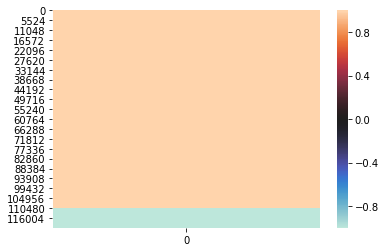

In [17]:
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(mr.f.f['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(mr.f.f['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0);